<a href="https://colab.research.google.com/github/donw385/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 test-train-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [38]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
y = df['price'].values
X = df['sqft_living'].values[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 1) 

(17290, 1)
(4323, 1)
(17290,)
(4323,)


In [8]:
model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [279.55477932]

 Intercept:  -41999.18603993731


In [9]:
#49% using just square ft

y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 76484977061.77612
RMSE is 276559.1746114674
R^2 is 0.49406905389089006


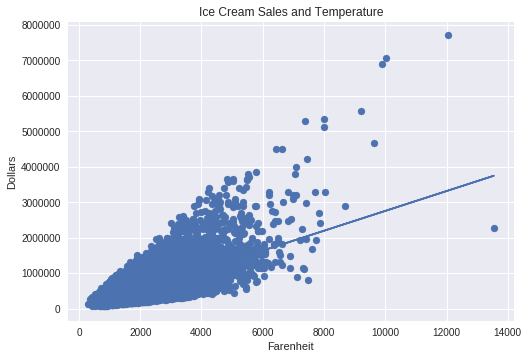

In [12]:
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df.sqft_living, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

# Graph axes and title
plt.ylabel("Home Price")
plt.xlabel("Square Feet")
plt.title("Home Price and Square Footage")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 test-train-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [30]:
y2 = df.loc[:, ['price']].values
X2 = df.loc[:, ['sqft_living','grade']].values

X_train, X_test, Y_train, Y_test = train_test_split(X2, y2, test_size=.2, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 2) 

(17290, 2)
(4323, 2)
(17290, 1)
(4323, 1)


In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [  185.10393866 96261.37224464]

Intercept Value:  [-582887.80204686]


In [32]:
#54% using just square ft, grade

y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 69834518251.59692
RMSE is 264262.2149524917
R^2 is 0.5380603453464137


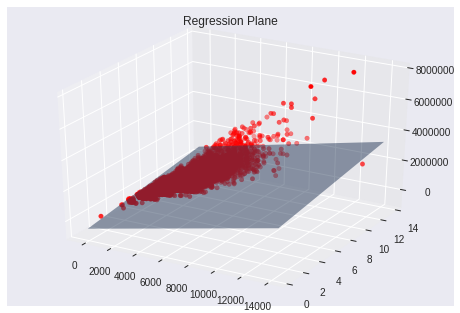

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['grade'], df['price'],c='red')


# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [76]:
y3 = df.loc[:, ['price']].values
X3 = df.drop(['price','id','date'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X3, y3, test_size=.2, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 20) 

(17290, 18)
(4323, 18)
(17290, 1)
(4323, 1)


In [77]:
model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [[-3.43354187e+04  4.45645289e+04  1.09015817e+02  8.88473539e-02
   7.00312952e+03  5.62413070e+05  5.36411070e+04  2.45267101e+04
   9.45678917e+04  7.00227409e+01  3.89930758e+01 -2.68076890e+03
   2.04156328e+01 -5.52253038e+02  5.95968122e+05 -1.94585724e+05
   2.12143306e+01 -3.25831873e-01]]

 Intercept:  [6643873.5278885]


In [78]:
#70% R squared

y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 45173046132.790405
RMSE is 212539.51663817815
R^2 is 0.7011904448878395


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


In [79]:
#try to beat 69% r squared

y4 = df.loc[:, ['price']].values
X4 = df.drop(['price','id','date'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X4, y4, test_size=.2, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

(21613, 20) 

(17290, 18)
(4323, 18)
(17290, 1)
(4323, 1)
MSE is 45173046132.790405
RMSE is 212539.51663817815
R^2 is 0.7011904448878395


In [80]:
y4

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])